### feature selection(변수 선택법)
* 필요한 변수만 선택하여 모델의 예측력을 높이거나 과적합을 줄이는 것
* 알고리즘의 정확도가 유사하다면 변수의 개수가 적을수록 속도가 빠르다
* 방법
  
    - 단변량(filter) : 특정 컬럼이 또 다른 컬럼과 상관관계가 있는지 확인하는 방법
    - 전진/후진 선택법(wrapper) : 컬럼을 하나씩 추가하며 점수 확인 / 하나씩 빼며 점수 확인
    - RFE : 사이킷런에서 제공하는 라이브러리를 이용하여 변수의 중요도를 확인하여 변수를 선택하는 방법
    - embed(임베드) : 알고리즘의 성질 이용
        - 알고리즘 내부에서 각 feature 구송 요소들이 얼마나 사용 되었는지를 알아보는 방식
        - 알고리즘들을 이용해 변수의 중요도를 파악, 중요도 낮은 컬럼은 지울 수 있다
        - 참고
            * RFE와 embed 방식은 특정 알고리즘에 존재하며, 해당 방식을 사용할 수 없는 알고리즘들이 존재한다.(KNN, SVR(kernel=rbf)등 사용 못함)
            * Tree계열 알고리즘들은 사용 가능하다(Random Forest, Decision Tree 등)

In [18]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
df = pd.read_csv('../data_set/6.회귀/data_cleaning.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,temp_int
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,9
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,9
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,9
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,9
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,9


In [2]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'temp_int'],
      dtype='object')

In [21]:
f = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour']
l = 'count'
X, y = df[f], df[l]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test  : " , model.score(X_test, y_test))

train :  0.991525574424814
test  :  0.9423213638623735


<Axes: xlabel='temp', ylabel='atemp'>

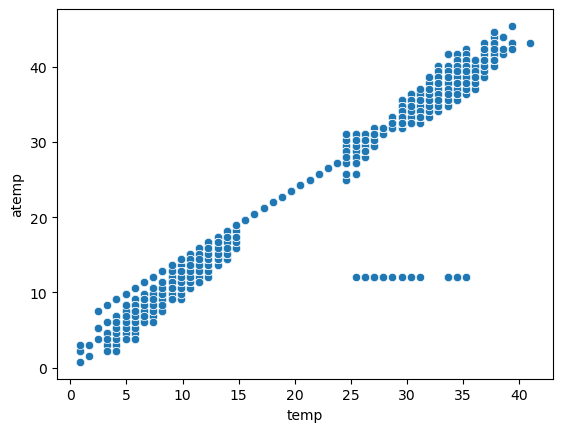

In [7]:
import seaborn as sns
sns.scatterplot(data=df, x="temp", y="atemp")

In [9]:
df.corr(numeric_only=True)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,temp_int
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,0.257917
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,0.000192
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,0.029603
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.054556
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,0.999313
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,0.984431
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.064205
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.017660
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.467047
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,0.318048


<Axes: >

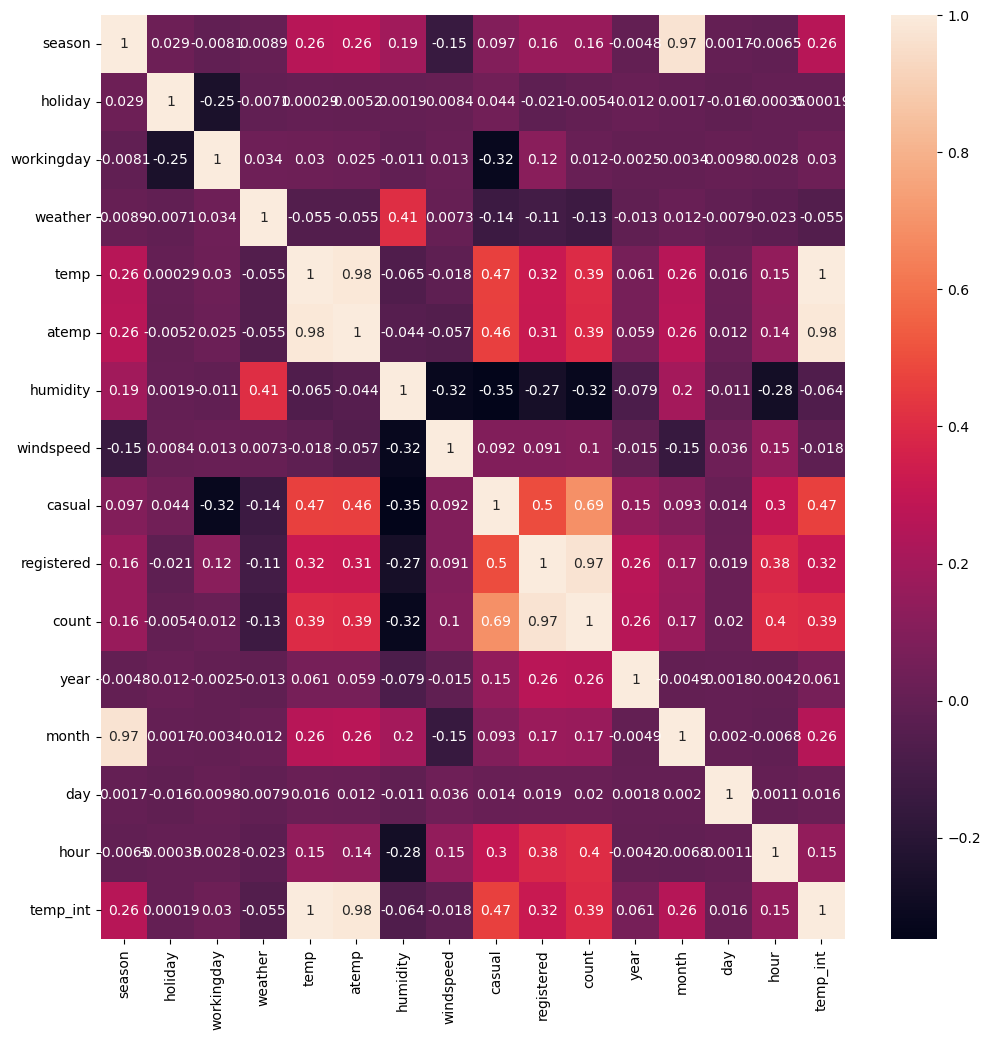

In [12]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 12))
sns.heatmap( df.corr(numeric_only=True), annot=True)

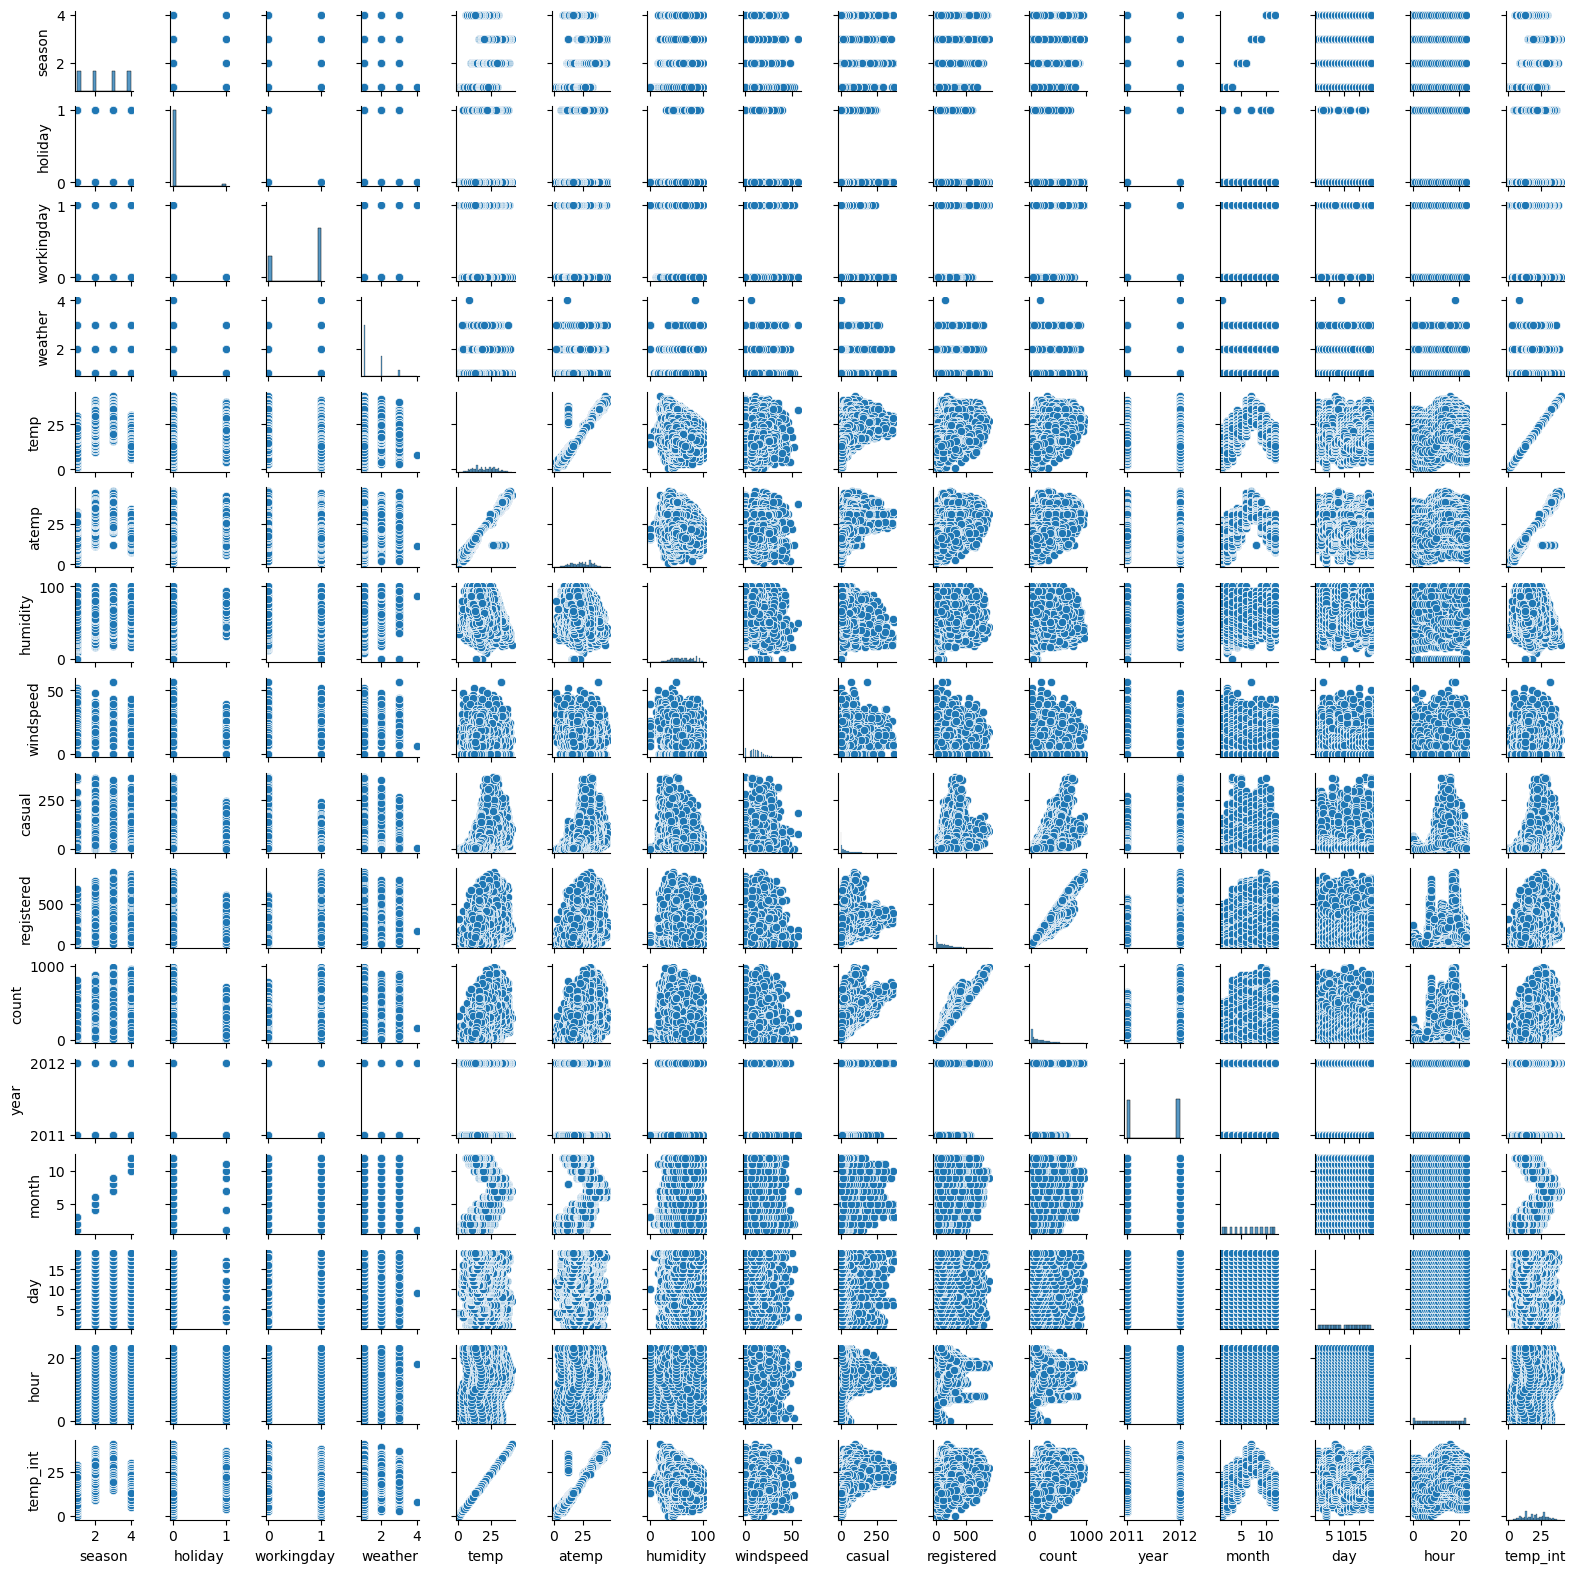

In [11]:
sns.pairplot(df, height = 1)

In [20]:
f = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour'] # atemp 제거
X_train, X_test, y_train, y_test = train_test_split(df[f], df[l], test_size=0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test  : " , model.score(X_test, y_test))

train :  0.9914664082677385
test  :  0.9418249391910712


### wrapper(전진/후진 선택)
* feature를 추가 / 제거하면서 모델의 성능을 확인한다
* combinations : 모든 값들의 경우의 수를 뽑아준다

In [17]:
from itertools import combinations
sample_bag = [1, 2, 3, 4]
for c in combinations(sample_bag, 2):
    print(c, type(c) )

(1, 2) <class 'tuple'>
(1, 3) <class 'tuple'>
(1, 4) <class 'tuple'>
(2, 3) <class 'tuple'>
(2, 4) <class 'tuple'>
(3, 4) <class 'tuple'>


In [23]:
all_result = []

for c in combinations(f, 2):
    print(c)

('season', 'holiday')
('season', 'workingday')
('season', 'weather')
('season', 'temp')
('season', 'atemp')
('season', 'humidity')
('season', 'windspeed')
('season', 'year')
('season', 'month')
('season', 'day')
('season', 'hour')
('holiday', 'workingday')
('holiday', 'weather')
('holiday', 'temp')
('holiday', 'atemp')
('holiday', 'humidity')
('holiday', 'windspeed')
('holiday', 'year')
('holiday', 'month')
('holiday', 'day')
('holiday', 'hour')
('workingday', 'weather')
('workingday', 'temp')
('workingday', 'atemp')
('workingday', 'humidity')
('workingday', 'windspeed')
('workingday', 'year')
('workingday', 'month')
('workingday', 'day')
('workingday', 'hour')
('weather', 'temp')
('weather', 'atemp')
('weather', 'humidity')
('weather', 'windspeed')
('weather', 'year')
('weather', 'month')
('weather', 'day')
('weather', 'hour')
('temp', 'atemp')
('temp', 'humidity')
('temp', 'windspeed')
('temp', 'year')
('temp', 'month')
('temp', 'day')
('temp', 'hour')
('atemp', 'humidity')
('atemp',

In [24]:
all_result = []

for c in combinations(f, 2):
    print(list(c))

['season', 'holiday']
['season', 'workingday']
['season', 'weather']
['season', 'temp']
['season', 'atemp']
['season', 'humidity']
['season', 'windspeed']
['season', 'year']
['season', 'month']
['season', 'day']
['season', 'hour']
['holiday', 'workingday']
['holiday', 'weather']
['holiday', 'temp']
['holiday', 'atemp']
['holiday', 'humidity']
['holiday', 'windspeed']
['holiday', 'year']
['holiday', 'month']
['holiday', 'day']
['holiday', 'hour']
['workingday', 'weather']
['workingday', 'temp']
['workingday', 'atemp']
['workingday', 'humidity']
['workingday', 'windspeed']
['workingday', 'year']
['workingday', 'month']
['workingday', 'day']
['workingday', 'hour']
['weather', 'temp']
['weather', 'atemp']
['weather', 'humidity']
['weather', 'windspeed']
['weather', 'year']
['weather', 'month']
['weather', 'day']
['weather', 'hour']
['temp', 'atemp']
['temp', 'humidity']
['temp', 'windspeed']
['temp', 'year']
['temp', 'month']
['temp', 'day']
['temp', 'hour']
['atemp', 'humidity']
['atemp',

In [25]:
all_result = []

for c in combinations(f, 2):
    print(df[list(c)])
# c의 자료형이 튜플이므로 df(c)하면 오류 발생, list에 바꾼 후 출력해야함!

       season  holiday
0           1        0
1           1        0
2           1        0
3           1        0
4           1        0
...       ...      ...
10881       4        0
10882       4        0
10883       4        0
10884       4        0
10885       4        0

[10886 rows x 2 columns]
       season  workingday
0           1           0
1           1           0
2           1           0
3           1           0
4           1           0
...       ...         ...
10881       4           1
10882       4           1
10883       4           1
10884       4           1
10885       4           1

[10886 rows x 2 columns]
       season  weather
0           1        1
1           1        1
2           1        1
3           1        1
4           1        1
...       ...      ...
10881       4        1
10882       4        1
10883       4        1
10884       4        1
10885       4        1

[10886 rows x 2 columns]
       season   temp
0           1   9.84
1           1   

In [27]:
all_result = []

for c in combinations(f, 2):
    #print(df[list(c)])
    X_train, X_test, y_train, y_test = train_test_split(df[list(c)], df['count'], test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    #print(c)
    #print("train : " , train_score)
    #print("test  : " , test_score)
    #print("="*20)
    result = {'combination' : str(c), "train":train_score, "test":test_score }
    all_result.append(result)
all_result

[{'combination': "('season', 'holiday')",
  'train': 0.06347947039519974,
  'test': 0.05738016791988865},
 {'combination': "('season', 'workingday')",
  'train': 0.06243038039668636,
  'test': 0.05982251119060589},
 {'combination': "('season', 'weather')",
  'train': 0.08451317314491291,
  'test': 0.06746983653495553},
 {'combination': "('season', 'temp')",
  'train': 0.23849867978283568,
  'test': 0.1952887378365421},
 {'combination': "('season', 'atemp')",
  'train': 0.23151110846631218,
  'test': 0.22284953274446007},
 {'combination': "('season', 'humidity')",
  'train': 0.2827183928947514,
  'test': 0.25098756964614777},
 {'combination': "('season', 'windspeed')",
  'train': 0.10039406080486524,
  'test': 0.07375773531501628},
 {'combination': "('season', 'year')",
  'train': 0.1254259920969747,
  'test': 0.14119937299667729},
 {'combination': "('season', 'month')",
  'train': 0.07428234489492835,
  'test': 0.07059155766860259},
 {'combination': "('season', 'day')",
  'train': 0.07

In [30]:
#all_result 를 데이터프레임으로 변경
result_df = pd.DataFrame(all_result).sort_values(by="test")
result_df

,combination,train,test
58,"('windspeed', 'day')",0.073561,-0.024980
11,"('holiday', 'workingday')",0.000347,-0.000983
28,"('workingday', 'day')",0.005022,-0.000973
19,"('holiday', 'day')",0.006774,0.002312
36,"('weather', 'day')",0.029607,0.011632
...,...,...,...
44,"('temp', 'hour')",0.677294,0.604882
10,"('season', 'hour')",0.608730,0.609543
62,"('year', 'hour')",0.622742,0.613553
64,"('month', 'hour')",0.626696,0.626532


In [31]:
result_df.tail() 
# test 점수가 높은 마지막 5개 보여주기 

,combination,train,test
44,"('temp', 'hour')",0.677294,0.604882
10,"('season', 'hour')",0.608730,0.609543
62,"('year', 'hour')",0.622742,0.613553
64,"('month', 'hour')",0.626696,0.626532
29,"('workingday', 'hour')",0.655686,0.648832


In [34]:
fe = ['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day'] 
best_f = ['workingday', 'hour'] # 위에 결과 중 가장 좋은 결과였던 두 항목 빼기 

In [35]:
for f in fe:
    print(f)

season
holiday
weather
temp
humidity
windspeed
year
month
day


In [36]:
all_result = []
for f in fe:
    #print(f)
    best_f.append(f)
    print(best_f)
    
    best_f.pop() # 제일 마지막에 있는 값 뺴기
    print(best_f)
    print("="*20)

['workingday', 'hour', 'season']
['workingday', 'hour']
['workingday', 'hour', 'holiday']
['workingday', 'hour']
['workingday', 'hour', 'weather']
['workingday', 'hour']
['workingday', 'hour', 'temp']
['workingday', 'hour']
['workingday', 'hour', 'humidity']
['workingday', 'hour']
['workingday', 'hour', 'windspeed']
['workingday', 'hour']
['workingday', 'hour', 'year']
['workingday', 'hour']
['workingday', 'hour', 'month']
['workingday', 'hour']
['workingday', 'hour', 'day']
['workingday', 'hour']


In [37]:
all_result = []
for f in fe:
    best_f.append(f)
    X_train, X_test, y_train, y_test = train_test_split(df[best_f], df['count'], test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)

    result = {"combination":best_f.copy(), "train":train_s, "test":test_s}
    all_result.append(result)
    
    best_f.pop() # 제일 마지막에 있는 값 뺴기

In [38]:
#all_result 를 데이터프레임으로 변경
result_df = pd.DataFrame(all_result).sort_values(by="test")
result_df

,combination,train,test
8,"[workingday, hour, day]",0.677888,0.585052
5,"[workingday, hour, windspeed]",0.706074,0.609548
4,"[workingday, hour, humidity]",0.797193,0.619320
1,"[workingday, hour, holiday]",0.652451,0.662813
2,"[workingday, hour, weather]",0.684041,0.686665
3,"[workingday, hour, temp]",0.834219,0.722157
0,"[workingday, hour, season]",0.754930,0.749191
7,"[workingday, hour, month]",0.782719,0.757726
6,"[workingday, hour, year]",0.766086,0.769369


In [45]:
def features_select(feature, best_f):
    all_result = []
    for f in feature:
        best_f.append(f)
        X_train, X_test, y_train, y_test = train_test_split(df[best_f], df['count'], test_size=0.3)
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        train_s = model.score(X_train, y_train)
        test_s = model.score(X_test, y_test)
    
        result = {"combination":best_f.copy(), "train":train_s, "test":test_s}
        all_result.append(result)
        best_f.pop()
    return all_result;

In [44]:
features_select([1, 2, 3])

[{'combination': ['workingday', 'hour', 'season'],
  'train': 0.7555507234297799,
  'test': 0.750393644360347},
 {'combination': ['workingday', 'hour', 'holiday'],
  'train': 0.6480821336767673,
  'test': 0.6718684082267694},
 {'combination': ['workingday', 'hour', 'weather'],
  'train': 0.6894571702427803,
  'test': 0.6742161474142248},
 {'combination': ['workingday', 'hour', 'temp'],
  'train': 0.826331833087265,
  'test': 0.7497302581750303},
 {'combination': ['workingday', 'hour', 'humidity'],
  'train': 0.7949390028925872,
  'test': 0.62369085243026},
 {'combination': ['workingday', 'hour', 'windspeed'],
  'train': 0.7055793366292642,
  'test': 0.6068872410095603},
 {'combination': ['workingday', 'hour', 'year'],
  'train': 0.7670025001111469,
  'test': 0.7659286875059912},
 {'combination': ['workingday', 'hour', 'month'],
  'train': 0.7799827950826431,
  'test': 0.7612634175740177},
 {'combination': ['workingday', 'hour', 'day'],
  'train': 0.680224255133913,
  'test': 0.57353414

In [46]:
fe = ['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day'] 
best_f = ['workingday', 'hour', 'year'] 

In [47]:
result_df = pd.DataFrame(features_select(fe, best_f)).sort_values(by="test")
result_df.tail()

,combination,train,test
1,"[workingday, hour, year, holiday]",0.769311,0.767517
2,"[workingday, hour, year, weather]",0.799982,0.787452
3,"[workingday, hour, year, temp]",0.928812,0.846404
0,"[workingday, hour, year, season]",0.869592,0.872963
6,"[workingday, hour, year, month]",0.908082,0.879393


In [48]:
# 후진 선택법
fe = ['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'workingday', 'hour', 'year'] 

In [49]:
len(fe)

11

In [51]:
all_result = []
for c in combinations(fe, len(fe)-1 ):
    target = list(c)
    print(target)

['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'workingday', 'hour']
['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'workingday', 'year']
['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'year']
['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'workingday', 'hour', 'year']
['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'day', 'workingday', 'hour', 'year']
['season', 'holiday', 'weather', 'temp', 'humidity', 'month', 'day', 'workingday', 'hour', 'year']
['season', 'holiday', 'weather', 'temp', 'windspeed', 'month', 'day', 'workingday', 'hour', 'year']
['season', 'holiday', 'weather', 'humidity', 'windspeed', 'month', 'day', 'workingday', 'hour', 'year']
['season', 'holiday', 'temp', 'humidity', 'windspeed', 'month', 'day', 'workingday', 'hour', 'year']
['season', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'workingday

In [52]:
all_result = []
for c in combinations(fe, len(fe)-1 ):
    target = list(c)
    #print(target)
    X_train, X_test, y_train, y_test = train_test_split(df[target], df[l], test_size=0.3)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)

    dropped = set(fe) - set(target) # 어떤 컬럼이 빠졌는지 확인 가능
    result = {"dropped":dropped, "train":train_s, "test":test_s}
    all_result.append(result)

In [53]:
result_df = pd.DataFrame(all_result).sort_values(by="test")
result_df

,dropped,train,test
1,{hour},0.905109,0.448598
2,{workingday},0.973221,0.792663
0,{year},0.980559,0.865401
6,{humidity},0.990250,0.926511
7,{temp},0.990908,0.930990
8,{weather},0.990524,0.931938
4,{month},0.991413,0.934556
9,{holiday},0.990961,0.938726
3,{day},0.991376,0.939431
5,{windspeed},0.991943,0.941404


In [54]:
fe = ['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day', 'workingday', 'hour', 'year'] 

In [56]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()

rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame()
rfe_df["ranking"] = rfe.ranking_
rfe_df["features"] = X_train.columns
rfe_df.sort_values(by="ranking")
# ranking == 1 항목들이 가장 중요한 항목임을 알 수 있음 

,ranking,features
2,1,temp
5,1,month
7,1,workingday
8,1,hour
9,1,year
3,2,humidity
6,3,day
1,4,weather
4,5,windspeed
0,6,holiday


In [58]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test  : ", model.score(X_test, y_test))

train :  0.9914971445488183
test  :  0.9437616348810615


In [63]:
features = ['temp', 'month', 'workingday', 'hour', 'year'] # 1순위 

In [64]:
X_tr, X_te, y_tr, y_te = train_test_split(df[features], df[l], test_size=0.3)
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
print("train : ", model.score(X_tr, y_tr))
print("test  : ", model.score(X_te, y_te))

train :  0.9724684363591911
test  :  0.8890727912780976


In [65]:
features = ['temp', 'month', 'workingday', 'hour', 'year', 'humidity', 'day'] # 1~3 순위
X_tr, X_te, y_tr, y_te = train_test_split(df[features], df[l], test_size=0.3)
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
print("train : ", model.score(X_tr, y_tr))
print("test  : ", model.score(X_te, y_te))

train :  0.9908482031909532
test  :  0.9308057603709726


In [66]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print("train : ", model.score(X_train, y_train))
print("test  : ", model.score(X_test, y_test))
print(model.feature_importances_) # 중요도 
print(X_train.columns)

train :  0.9912288528247474
test  :  0.94208651369464
[0.00297674 0.01411946 0.09560907 0.03212435 0.01011782 0.05456134
 0.01399795 0.07065377 0.61956474 0.08627476]
Index(['holiday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'day',
       'workingday', 'hour', 'year'],
      dtype='object')


In [67]:
df_1 = pd.DataFrame()
df_1['rank'] = model.feature_importances_
df_1['feature'] = X_train.columns
df_1.sort_values(by="rank", ascending=False)

,rank,feature
8,0.619565,hour
2,0.095609,temp
9,0.086275,year
7,0.070654,workingday
5,0.054561,month
3,0.032124,humidity
1,0.014119,weather
6,0.013998,day
4,0.010118,windspeed
0,0.002977,holiday


In [68]:
f = ['hour', 'temp', 'year', 'workingday', 'month', 'humidity']
X_train, X_test, y_train, y_test = train_test_split(df[f], df[l], test_size=0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("train : ", model.score(X_train, y_train))
print("test  : ", model.score(X_test, y_test))

train :  0.9896928370864897
test  :  0.9215184615258611
